This script performs the analysis of the proteomics data at 24 h.

In [1]:
import pandas, numpy, seaborn

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition
import scipy, scipy.signal

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.family':'sans-serif',
                            'font.size':20, 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40})

### user-defined variables

In [4]:
four_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_4h_all_prts_Relative_Quantification.csv'
twenty_four_input_file = '/home/adrian/projects/vigur/data/proteomics/HPMVEC_Proteomics_September_2022/HPMVECs_september2022_24h_all_prts_Relative_Quantification.csv'

### define metadata

In [5]:
metadata = {}

###

metadata['4h control'] = ['20220905_ARNAR_010', '20220905_ARNAR_011', '20220905_ARNAR_035', '20220905_ARNAR_036', '20220905_ARNAR_058', '20220905_ARNAR_059']

metadata['4h epi'] = ['20220905_ARNAR_004', '20220905_ARNAR_005', '20220905_ARNAR_008', '20220905_ARNAR_009', '20220905_ARNAR_051', '20220905_ARNAR_052']


metadata['4h nor'] = ['20220905_ARNAR_013', '20220905_ARNAR_014', '20220905_ARNAR_019', '20220905_ARNAR_020', '20220905_ARNAR_044', '20220905_ARNAR_046']

metadata['4h epinor'] = ['20220905_ARNAR_024', '20220905_ARNAR_025', '20220905_ARNAR_026', '20220905_ARNAR_027']

metadata['4h TNFa'] = ['20220905_ARNAR_060', '20220905_ARNAR_065']

####

metadata['24h control'] = ['20220905_ARNAR_022', '20220905_ARNAR_023', '20220905_ARNAR_037', '20220905_ARNAR_038', '20220905_ARNAR_067', '20220905_ARNAR_068']

metadata['24h epi'] = ['20220905_ARNAR_031', '20220905_ARNAR_040']

metadata['24h nor'] = ['20220905_ARNAR_028', '20220905_ARNAR_053', '20220905_ARNAR_054', '20220905_ARNAR_062']

metadata['24h epinor'] = ['20220905_ARNAR_006', '20220905_ARNAR_007', '20220905_ARNAR_033', '20220905_ARNAR_034', '20220905_ARNAR_055']

metadata['24h TNFa'] = ['20220905_ARNAR_015', '20220905_ARNAR_016', '20220905_ARNAR_017', '20220905_ARNAR_018', '20220905_ARNAR_042', '20220905_ARNAR_043']

###
all_sample_names = [element for sublist in list(metadata.values()) for element in sublist]
print(len(all_sample_names))

early_sample_names = []
for treatment in metadata.keys():
    if treatment[:2] == '4h':
        for sample in metadata[treatment]:
            early_sample_names.append(sample)
print(len(early_sample_names))

late_sample_names = []
for treatment in metadata.keys():
    if treatment[:3] == '24h':
        for sample in metadata[treatment]:
            late_sample_names.append(sample)
print(len(late_sample_names))

47
24
23


### read data

In [6]:
df4 = pandas.read_csv(four_input_file, index_col=0, skiprows=2, sep=',')
df4.shape

(3183, 85)

In [7]:
df24 = pandas.read_csv(twenty_four_input_file, index_col=0, skiprows=2, sep=',')
df24.shape

(2686, 83)

### manipulate data

In [8]:
df4


,Peptide count,Unique peptides,Confidence score,Anova (p),q Value,Max fold change,Power,Highest mean condition,Lowest mean condition,Mass,...,20220905_ARNAR_044.2,20220905_ARNAR_046.2,20220905_ARNAR_024.2,20220905_ARNAR_025.2,20220905_ARNAR_026.2,20220905_ARNAR_027.2,20220905_ARNAR_060.2,20220905_ARNAR_065.2,no unique peptides,confidence<40
Accession,,,,,,,,,,,,,,,,,,,,,
Q86Y97,4,1,19.9706,2.294162e-07,0.000040,1.857857,1.0,TNFa 4h,NorEPI 4h,53025.4924,...,0,0,0,0,0,0,0,0,NaN,x
P07996,100,68,540.9306,2.828252e-07,0.000040,1.455024,1.0,NorEPI 4h,Ctrl 4h,133374.7259,...,0,0,37,51,31,0,0,0,NaN,NaN
Q9BYC5,12,3,58.5130,3.726699e-07,0.000040,2.085111,1.0,Ctrl 4h,TNFa 4h,66972.0815,...,0,0,0,1,0,0,0,0,NaN,NaN
P17612,17,3,111.8179,6.981399e-07,0.000056,1.372203,1.0,NorEPI 4h,TNFa 4h,40703.7821,...,0,0,0,0,0,0,0,0,NaN,NaN
Q9NVA2,28,10,132.4747,1.576348e-06,0.000101,1.266081,1.0,TNFa 4h,Epi 4h,49683.4837,...,0,0,1,6,2,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q92930,12,0,119.3084,NaN,NaN,NaN,NaN,---,---,23755.2297,...,0,0,0,0,0,0,0,0,x,NaN
Q93045,5,0,43.1622,NaN,NaN,NaN,NaN,---,---,20942.1591,...,0,0,0,0,0,0,0,0,x,NaN
Q93086,5,0,26.3792,NaN,NaN,NaN,NaN,---,---,48003.1742,...,0,0,0,0,0,0,0,0,x,NaN


In [9]:
print(df4.shape)
print(df4[df4['Unique peptides'] > 3].shape)
print(df4[(df4['Unique peptides'] > 3) & (df4['Confidence score'] > 40)].shape)

(3183, 85)
(1295, 85)
(1265, 85)


In [10]:
print(df24.shape)
print(df24[df24['Unique peptides'] > 3].shape)
print(df24[(df24['Unique peptides'] > 3) & (df24['Confidence score'] > 40)].shape)

(2686, 83)
(1132, 83)
(1080, 83)


In [11]:
new4 = df4[(df4['Unique peptides'] > 3) & (df4['Confidence score'] > 40)]
print(new4.shape)

working_labels = [label for label in new4.columns if label in all_sample_names]

new4 = numpy.log2(new4.loc[:, working_labels] + 1)
print(new4.shape)
new4

(1265, 85)
(1265, 24)


,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_019,20220905_ARNAR_020,20220905_ARNAR_044,20220905_ARNAR_046,20220905_ARNAR_024,20220905_ARNAR_025,20220905_ARNAR_026,20220905_ARNAR_027,20220905_ARNAR_060,20220905_ARNAR_065
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.045552,16.078366,16.161570,16.156538,16.229749,16.211154,15.643942,15.675235,15.817460,15.806405,...,16.285414,16.314586,16.509939,16.298168,16.384911,16.406426,16.328664,16.354238,16.145720,16.125135
Q9NVA2,12.240767,12.273150,12.230812,12.246755,12.321591,12.283944,12.229056,12.302041,12.452724,12.257791,...,12.362618,12.350376,12.322057,12.265512,12.272261,12.319145,12.297600,12.287144,12.600883,12.612712
P09382,16.043690,16.115637,16.117788,16.162780,16.369342,16.357563,16.185005,16.186321,16.538914,16.523372,...,16.308708,16.349512,16.634492,16.594343,16.689482,16.719676,16.648384,16.712877,17.017069,16.935930
P05783,12.269208,12.270107,12.158319,12.207953,12.203062,12.183435,12.140093,12.201144,12.316307,12.307321,...,12.343962,12.364029,12.300637,12.291244,12.450320,12.445915,12.419784,12.375704,12.452176,12.341501
P62942,14.042494,14.084990,13.992406,14.005147,14.289182,14.351097,14.020735,14.002046,14.194288,14.225131,...,14.068099,14.097839,14.414868,14.292437,14.488321,14.531343,14.471959,14.504447,14.652687,14.686721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P08240,11.285331,11.255580,10.993814,11.011575,11.726454,11.892376,11.074597,11.051692,11.468444,11.367476,...,11.134844,11.174485,11.480555,11.168212,11.269374,11.343284,11.417818,11.439900,11.334302,11.365686
Q15181,12.069411,12.079153,12.072432,12.126384,12.391033,12.391620,12.072226,12.071841,12.168879,12.141165,...,12.004368,12.028826,12.534314,12.352118,12.185070,12.160218,12.301388,12.225533,12.208704,12.218002
O94929,11.100895,11.061101,10.985095,10.966830,11.556627,11.706831,11.139484,11.076676,11.281246,11.196087,...,11.226472,11.256388,11.376595,11.075525,11.221480,11.249041,11.284186,11.286898,11.430896,11.106758


In [12]:
new24 = df24[(df24['Unique peptides'] > 3) & (df24['Confidence score'] > 40)]
print(new24.shape)

working_labels = [label for label in new24.columns if label in all_sample_names]

new24 = numpy.log2(new24.loc[:, working_labels] + 1)
print(new24.shape)

(1080, 83)
(1080, 23)


In [13]:
new = new4.join(new24, how='inner')
print(new.shape)
new.head()

(831, 47)


,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_040,20220905_ARNAR_028,20220905_ARNAR_053,20220905_ARNAR_054,20220905_ARNAR_062,20220905_ARNAR_006,20220905_ARNAR_007,20220905_ARNAR_033,20220905_ARNAR_034,20220905_ARNAR_055
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.045552,16.078366,16.161570,16.156538,16.229749,16.211154,15.643942,15.675235,15.817460,15.806405,...,17.816225,18.029872,17.883786,17.921699,17.925199,17.184453,17.218128,17.887719,17.832078,17.873730
P09382,16.043690,16.115637,16.117788,16.162780,16.369342,16.357563,16.185005,16.186321,16.538914,16.523372,...,16.773267,16.933475,16.836350,16.839131,16.766145,16.127916,16.153612,16.726475,16.656861,16.837625
P05783,12.269208,12.270107,12.158319,12.207953,12.203062,12.183435,12.140093,12.201144,12.316307,12.307321,...,12.263544,12.842586,12.298357,12.299477,12.319985,12.170155,12.178563,12.429194,12.302048,12.160752
P62942,14.042494,14.084990,13.992406,14.005147,14.289182,14.351097,14.020735,14.002046,14.194288,14.225131,...,14.439552,14.482028,14.436499,14.442217,14.426467,13.860129,13.879236,14.291202,14.219300,14.609219
P17931,12.400968,12.352007,12.099297,12.151457,12.238376,11.954017,12.421978,12.475879,12.528256,12.541191,...,13.492547,13.677336,13.569647,13.580258,13.573348,13.284282,13.333389,13.597277,13.536328,13.663408


### visualize data

190
18.881806210130105


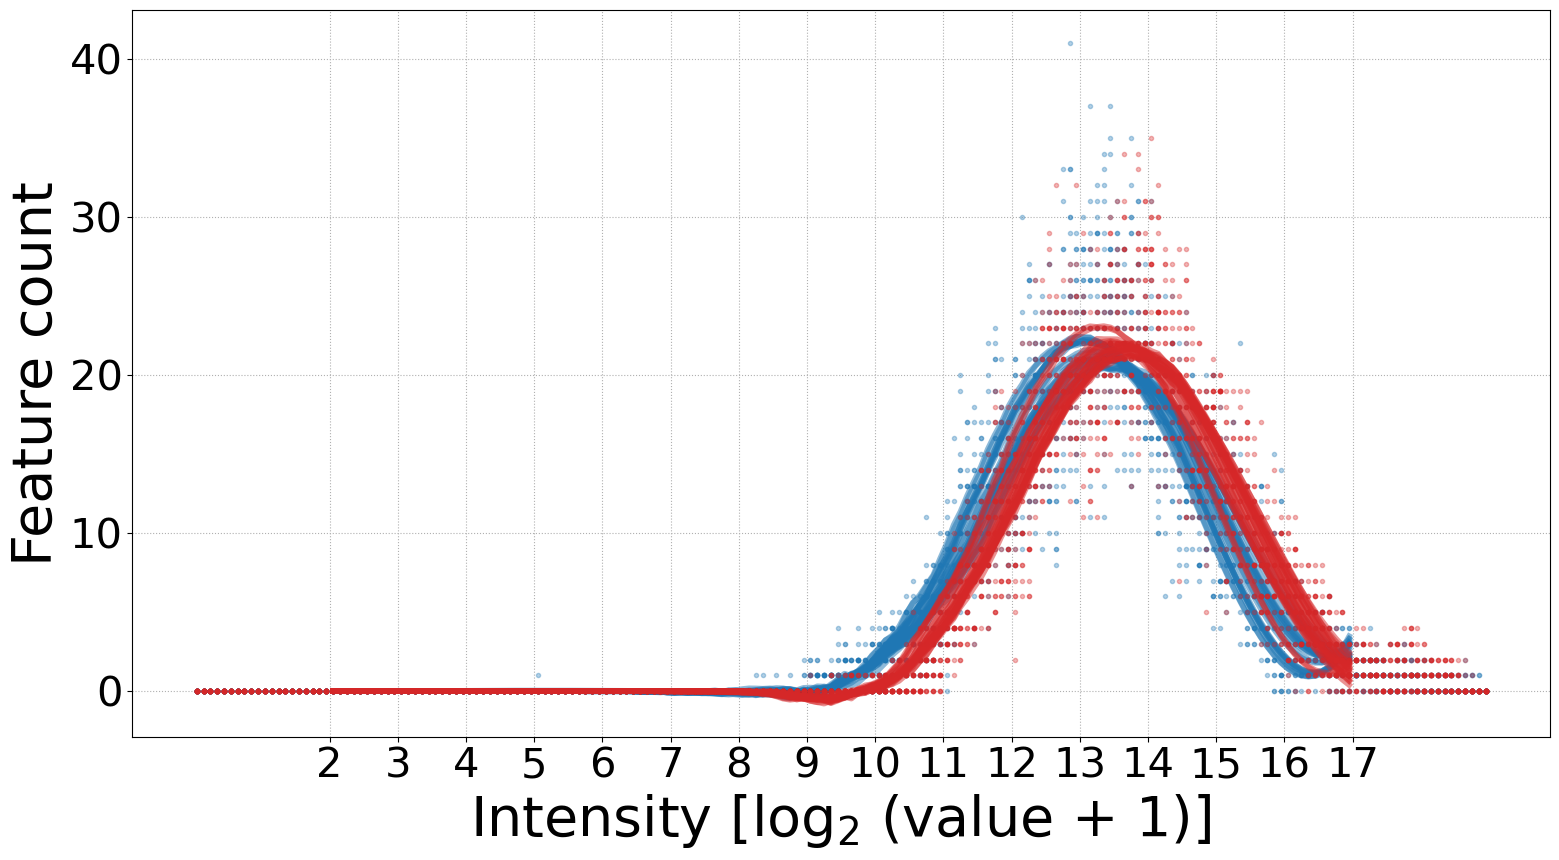

In [14]:
found_max = 19
number_of_bins = found_max * 10
margin = 20
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []; most_likely_late = []

for sample in new.columns:
        
    intensities = new.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    if sample in early_sample_names:
        most_likely_early.append(most_likely_intensity)
    else:
        most_likely_late.append(most_likely_intensity)
    
    # plotting
    if sample in early_sample_names:
        the_color = 'tab:blue'
    else:
        the_color = 'tab:red'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

matplotlib.pyplot.xticks(range(2, 18))
matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

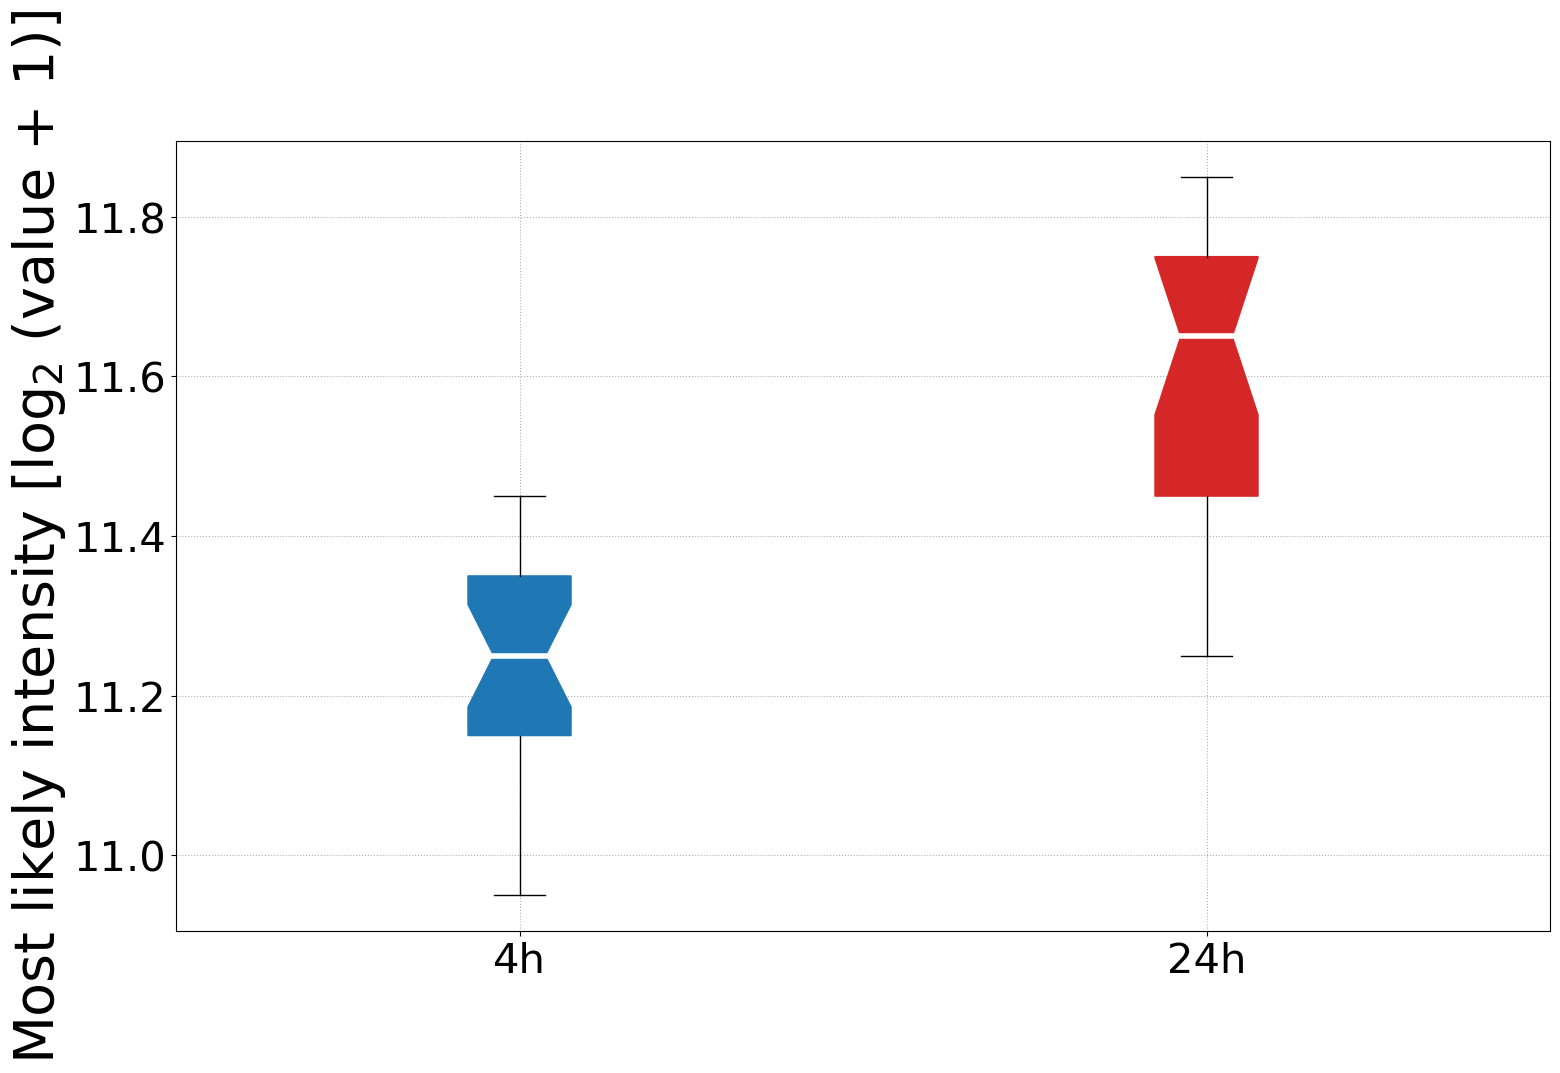

In [15]:
boxes = matplotlib.pyplot.boxplot([most_likely_early, most_likely_late], labels=['4h', '24h'], notch=True, patch_artist=True)

boxes['boxes'][0].set_color('tab:blue')
boxes['boxes'][1].set_color('tab:red')

boxes['medians'][0].set_linewidth(4)
boxes['medians'][0].set_color('white')
boxes['medians'][1].set_linewidth(4)
boxes['medians'][1].set_color('white')

matplotlib.pyplot.ylabel('Most likely intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

### normalization

In [16]:
#
# quantile normalization 
# taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
#

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(new.values, axis=0), index=new.index, columns=new.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
qndf = new.rank(method="min").stack().astype(int).map(df_mean).unstack()

### distributions after normalization

In [17]:
qndf

,20220905_ARNAR_004,20220905_ARNAR_005,20220905_ARNAR_008,20220905_ARNAR_009,20220905_ARNAR_051,20220905_ARNAR_052,20220905_ARNAR_010,20220905_ARNAR_011,20220905_ARNAR_035,20220905_ARNAR_036,...,20220905_ARNAR_040,20220905_ARNAR_028,20220905_ARNAR_053,20220905_ARNAR_054,20220905_ARNAR_062,20220905_ARNAR_006,20220905_ARNAR_007,20220905_ARNAR_033,20220905_ARNAR_034,20220905_ARNAR_055
Accession,,,,,,,,,,,,,,,,,,,,,
P07996,16.495311,16.412522,16.468913,16.412522,16.228931,16.279832,16.184212,16.132301,15.829015,15.857766,...,17.490866,17.768448,17.621813,17.690840,17.621813,17.621813,17.621813,17.768448,17.768448,17.490866
P09382,16.442774,16.523854,16.412522,16.468913,16.366131,16.412522,16.617758,16.579738,16.523854,16.579738,...,16.617758,16.731720,16.617758,16.617758,16.617758,16.495311,16.468913,16.579738,16.579738,16.579738
P05783,12.710051,12.699320,12.491881,12.536302,12.332069,12.325496,12.421750,12.487925,12.421750,12.465312,...,11.923226,12.647100,11.997241,11.978541,11.947172,12.138827,12.152867,12.152867,12.045659,11.830216
P62942,14.574896,14.612418,14.395919,14.412213,14.327456,14.449514,14.405751,14.366878,14.258914,14.316917,...,14.149101,14.265655,14.143408,14.118140,14.078095,14.027715,14.036722,14.069570,14.031614,14.298550
P17931,12.841917,12.757032,12.446329,12.484142,12.364966,12.185300,12.751925,12.795580,12.594850,12.652513,...,13.221558,13.448026,13.263184,13.271428,13.230759,13.390775,13.444267,13.372771,13.360123,13.403937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q06323,12.250162,12.200119,12.235757,12.243383,12.009467,11.844786,12.270044,12.192539,12.034318,11.997241,...,11.273900,11.038642,11.349796,11.364593,11.214077,11.748243,11.690909,11.423209,11.505478,11.570647
Q13310,10.235343,10.372223,10.438095,10.492606,10.052350,10.168853,10.168853,10.235343,10.235343,10.168853,...,12.852355,12.878682,13.072789,13.086647,12.747846,12.832660,12.841917,13.123165,13.174593,13.001805
Q9UNM6,10.788253,10.838994,10.817166,10.869206,10.817166,10.977651,10.635848,10.721357,10.755666,10.838994,...,10.994209,10.755666,11.062141,10.938852,11.273900,11.158930,11.158930,11.196439,11.117989,11.017326


190
18.379468609216786


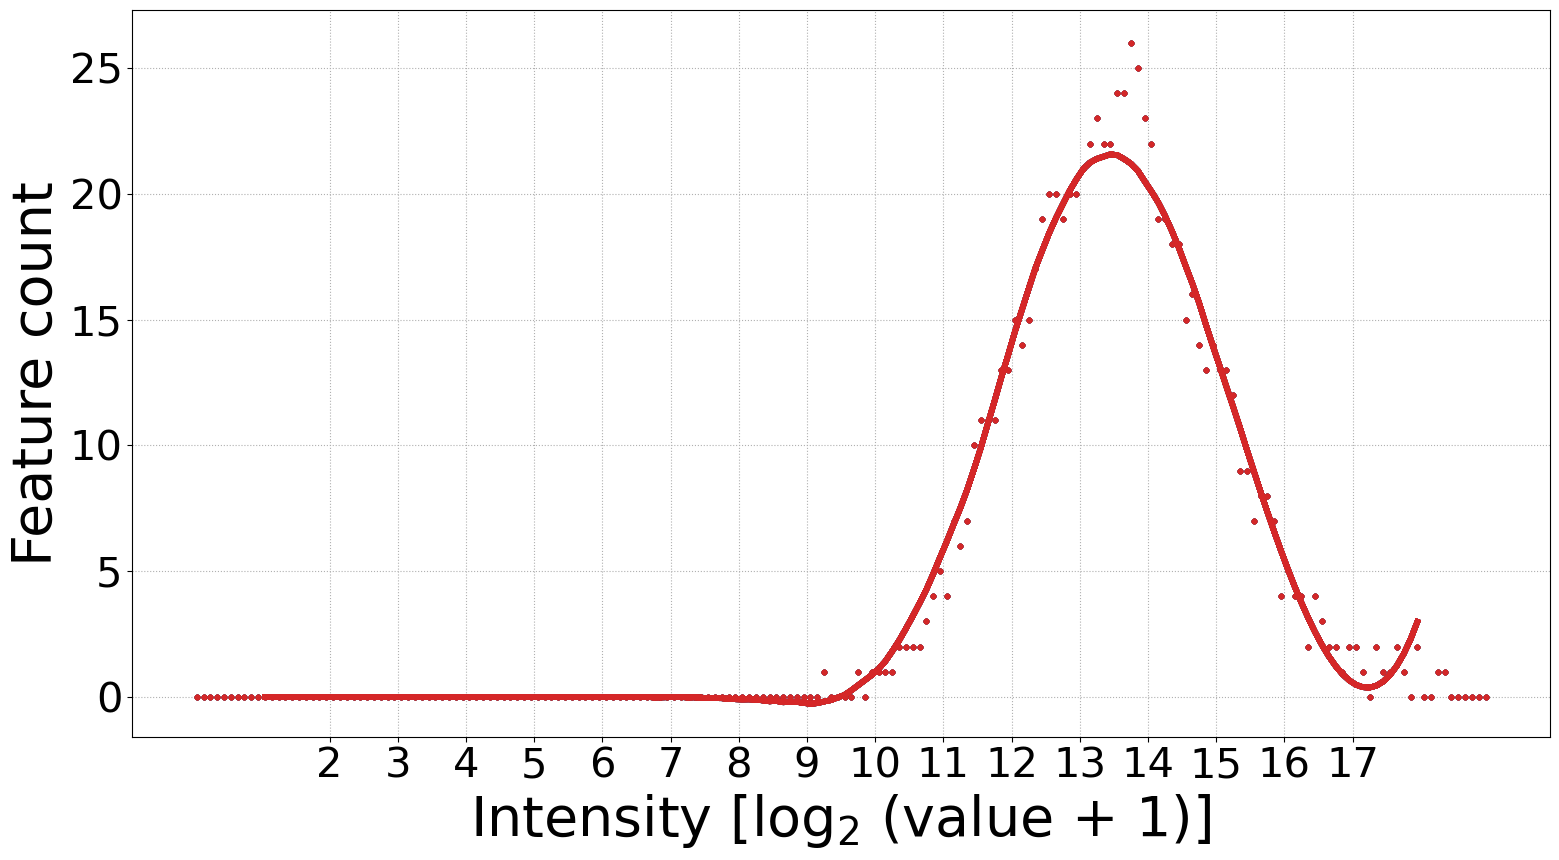

In [18]:
found_max = 19
number_of_bins = found_max * 10
margin = 10
print(number_of_bins)

absolute_max = 0
plotting_x = []; plotting_y = []
most_likely_early = []; most_likely_late = []

for sample in qndf.columns:
        
    intensities = qndf.loc[:, sample]
    
    # histogram
    hist, bin_edges = numpy.histogram(intensities, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    # curve fitting
    plotting_x = x[margin:-margin]
    plotting_hist = hist[margin:-margin]
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    
    # storing info to quantify bias
    most_likely_intensity = x[numpy.argmax(yhat)]
    if sample in early_sample_names:
        most_likely_early.append(most_likely_intensity)
    else:
        most_likely_late.append(most_likely_intensity)
    
    # plotting
    if sample in early_sample_names:
        the_color = 'tab:blue'
    else:
        the_color = 'tab:red'
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, color=the_color)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha=1/2, color=the_color)
    
    # check
    if max(intensities) > absolute_max:
        absolute_max = max(intensities)

# check print
print(absolute_max)

matplotlib.pyplot.xticks(range(2, 18))
matplotlib.pyplot.xlabel('Intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.ylabel('Feature count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

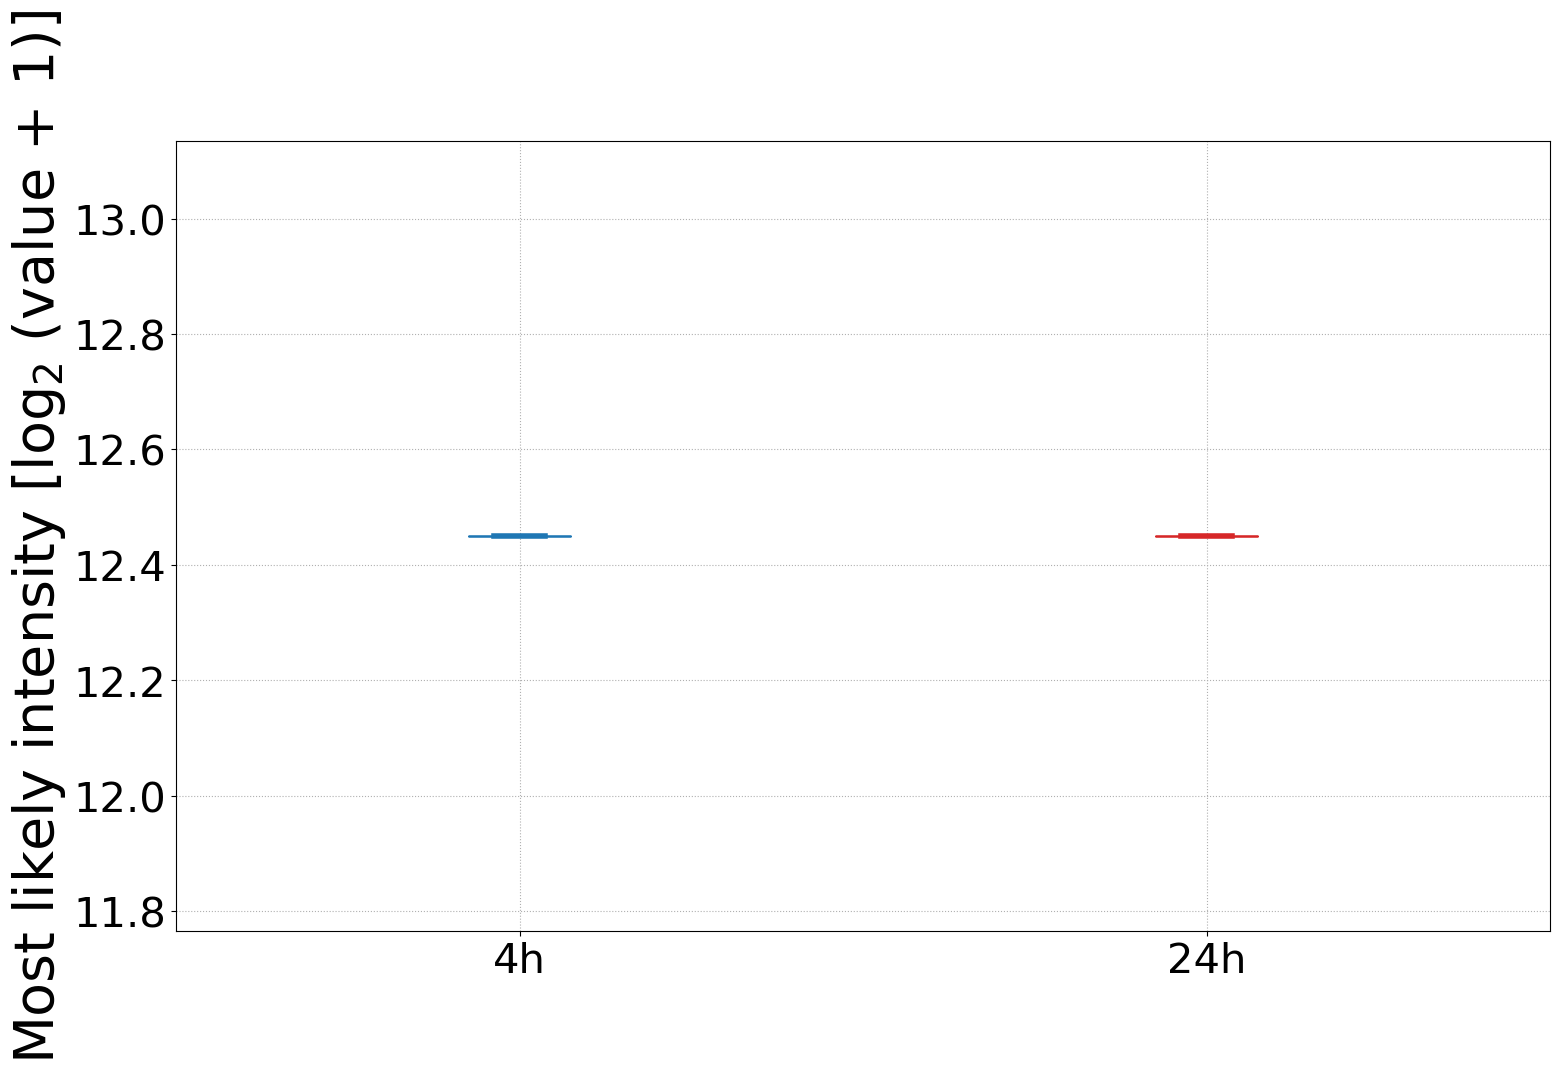

In [19]:
boxes = matplotlib.pyplot.boxplot([most_likely_early, most_likely_late], labels=['4h', '24h'], notch=True, patch_artist=True)

boxes['boxes'][0].set_color('tab:blue')
boxes['boxes'][1].set_color('tab:red')

boxes['medians'][0].set_linewidth(4)
boxes['medians'][0].set_color('tab:blue')
boxes['medians'][1].set_linewidth(4)
boxes['medians'][1].set_color('tab:red')

matplotlib.pyplot.ylabel('Most likely intensity [log$_2$ (value + 1)]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

### PCA

PCA on 4 hours, on 24 hours and both.

[0.61962662 0.08982598]


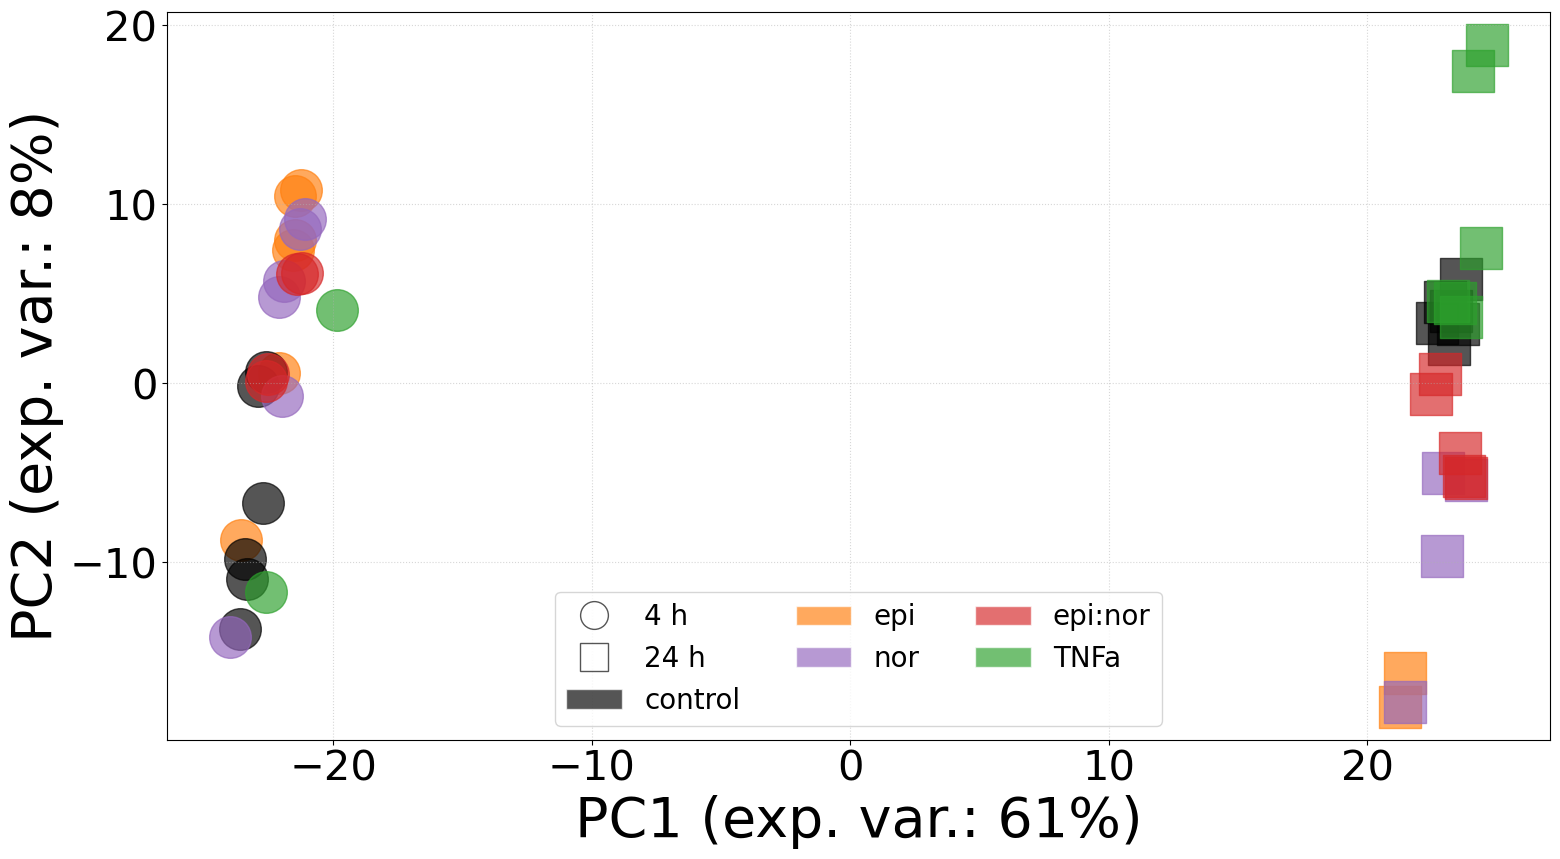

In [20]:
# quantile normalized all
transpose = qndf.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    if qndf.columns[i] in early_sample_names:
        the_marker = 'o'
    else:
        the_marker = 's'
        
    if qndf.columns[i] in metadata['4h control'] or qndf.columns[i] in metadata['24h control']:
        the_color = 'black'
    elif qndf.columns[i] in metadata['4h epi'] or qndf.columns[i] in metadata['24h epi']:
        the_color = 'tab:orange'
    elif qndf.columns[i] in metadata['4h nor'] or qndf.columns[i] in metadata['24h nor']:
        the_color = 'tab:purple'
    elif qndf.columns[i] in metadata['4h epinor'] or qndf.columns[i] in metadata['24h epinor']:
        the_color = 'tab:red'
    elif qndf.columns[i] in metadata['4h TNFa'] or qndf.columns[i] in metadata['24h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
    
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3), 
    
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['4 h', '24 h', 'control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3, loc='lower center')

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

[0.5791918  0.23970014]


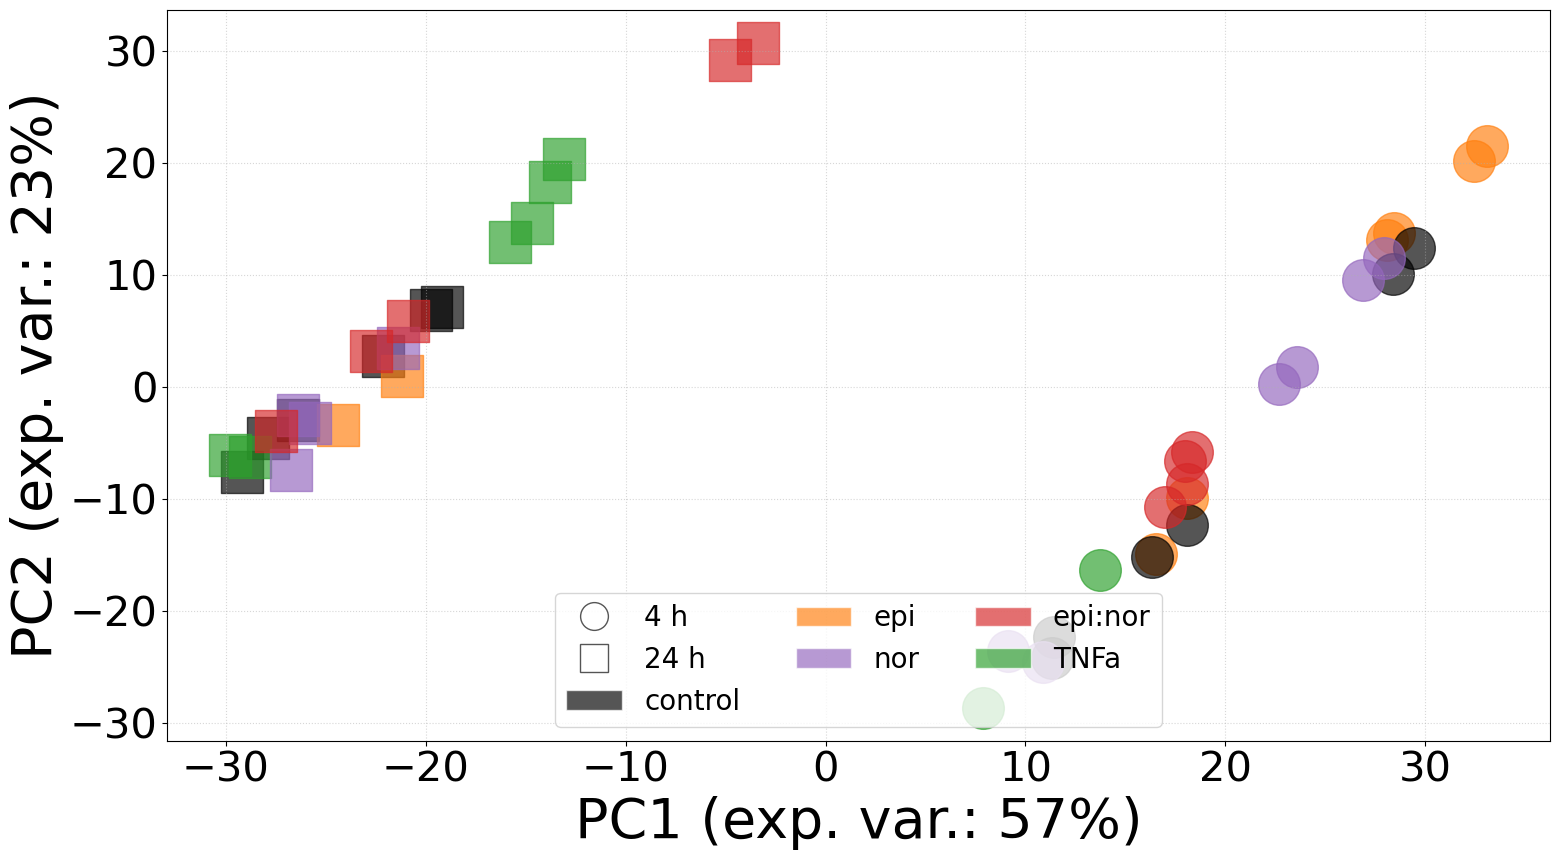

In [21]:
# non-quantile normalized all
transpose = new.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    if new.columns[i] in early_sample_names:
        the_marker = 'o'
    else:
        the_marker = 's'
        
    if new.columns[i] in metadata['4h control'] or new.columns[i] in metadata['24h control']:
        the_color = 'black'
    elif new.columns[i] in metadata['4h epi'] or new.columns[i] in metadata['24h epi']:
        the_color = 'tab:orange'
    elif new.columns[i] in metadata['4h nor'] or new.columns[i] in metadata['24h nor']:
        the_color = 'tab:purple'
    elif new.columns[i] in metadata['4h epinor'] or new.columns[i] in metadata['24h epinor']:
        the_color = 'tab:red'
    elif new.columns[i] in metadata['4h TNFa'] or new.columns[i] in metadata['24h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
        
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker=the_marker, alpha=2/3)
    
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='white', markeredgecolor='black', markersize=20, alpha=2/3), 
    
    matplotlib.patches.Patch(facecolor='black', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:orange', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:purple', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white', alpha=2/3),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white', alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['4 h', '24 h', 'control', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=3, loc='lower center')

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.tight_layout()

[0.3174538  0.16333733]


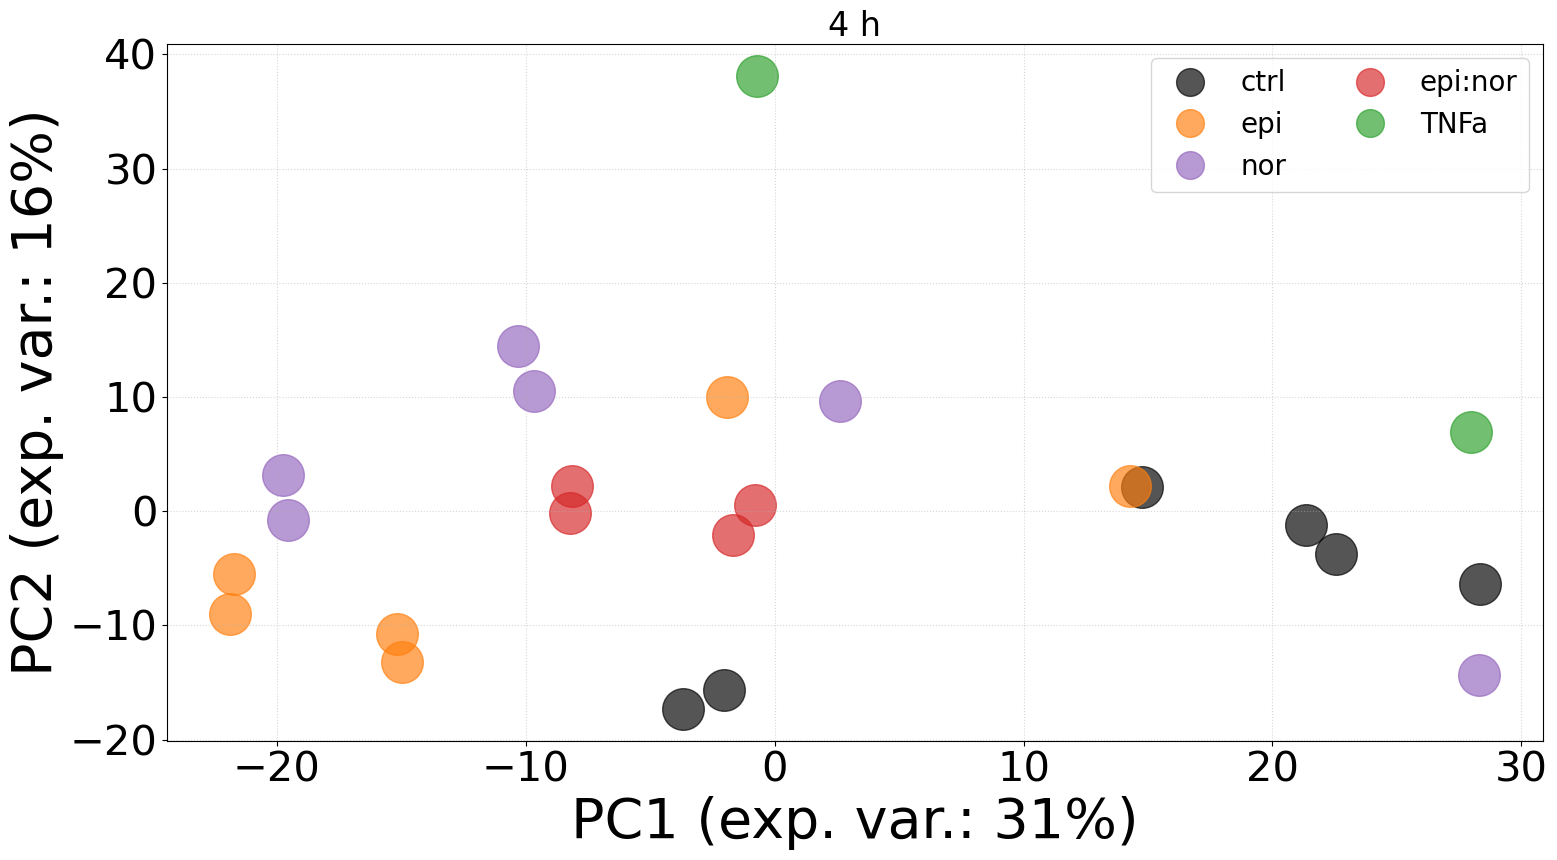

In [22]:
# quantile normalized 4 h
sub = qndf.loc[:, early_sample_names]
transpose = sub.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    if sub.columns[i] in metadata['4h control']:
        the_color = 'black'
    elif sub.columns[i] in metadata['4h epi']:
        the_color = 'tab:orange'
    elif sub.columns[i] in metadata['4h nor']:
        the_color = 'tab:purple'
    elif sub.columns[i] in metadata['4h epinor']:
        the_color = 'tab:red'
    elif sub.columns[i] in metadata['4h TNFa']:
        the_color = 'tab:green'
    else:
        raise ValueError('sample not classified')
    
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker='o', alpha=2/3)
    
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:orange', markeredgecolor='tab:orange', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:purple', markeredgecolor='tab:purple', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:red', markeredgecolor='tab:red', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:green', markeredgecolor='tab:green', markersize=20, alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['ctrl', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=2)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('4 h')
matplotlib.pyplot.tight_layout()

[0.3315354  0.15934751]


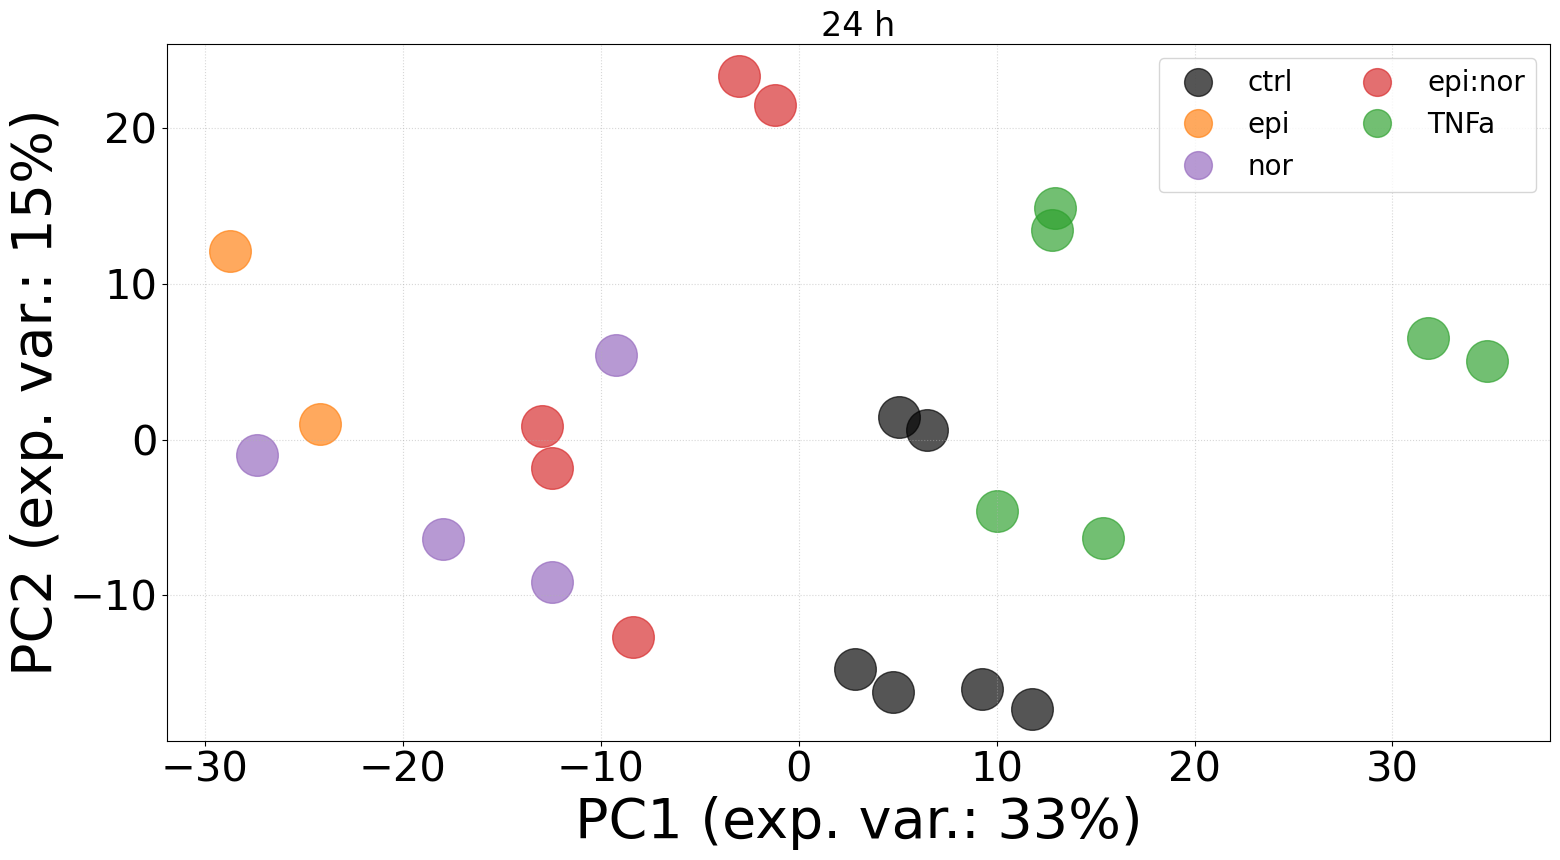

In [23]:
# quantile normalized 24 h
sub = qndf.loc[:, late_sample_names]
transpose = sub.transpose()
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(transpose)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

for i in range(len(locations)):
    
    if sub.columns[i] in metadata['24h control']:
        the_color = 'black'
    elif sub.columns[i] in metadata['24h epi']:
        the_color = 'tab:orange'
    elif sub.columns[i] in metadata['24h nor']:
        the_color = 'tab:purple'
    elif sub.columns[i] in metadata['24h epinor']:
        the_color = 'tab:red'
    elif sub.columns[i] in metadata['24h TNFa']:
        the_color = 'tab:green'
    else:
        print
        raise ValueError('sample not classified')
    
    matplotlib.pyplot.scatter(locations[i,0], locations[i,1], s=900, c=the_color, marker='o', alpha=2/3)
    
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markeredgecolor='black', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:orange', markeredgecolor='tab:orange', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:purple', markeredgecolor='tab:purple', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:red', markeredgecolor='tab:red', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:green', markeredgecolor='tab:green', markersize=20, alpha=2/3)
]
matplotlib.pyplot.legend(legend_elements, ['ctrl', 'epi', 'nor', 'epi:nor', 'TNFa'], ncol=2)

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.title('24 h')
matplotlib.pyplot.tight_layout()

### compute sample correlations

Certain rules to follow up: significance and fold-change. Present Venn diagrams and volcano plots

0.6914040462194893


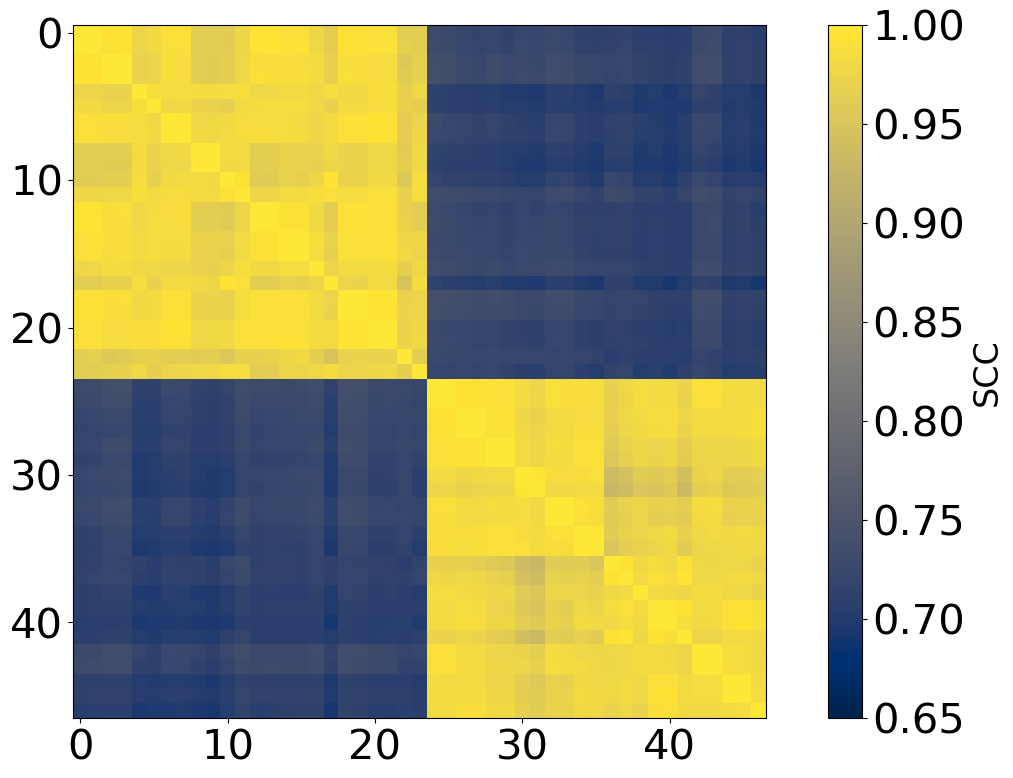

In [24]:
z = len(qndf.columns)
M = numpy.ones((z, z))
    
for i in range(len(qndf.columns)):
    for j in range(len(qndf.columns)):
        
        sample_a = qndf.columns[i]
        sample_b = qndf.columns[j]
        
        values_a =  qndf.loc[:, sample_a].values
        values_b = qndf.loc[:, sample_b].values
        
        # select only the central part of the distribution, from 8 to 16
        subset_a = []; subset_b = []
        for k in range(len(values_a)):
            if 11 <= values_a[k] <= 16 and 11 <= values_b[k] <= 16:
                subset_a.append(values_a[k]); subset_b.append(values_b[k])
        
        # size
        rho, pval = scipy.stats.spearmanr(subset_a, subset_b)
        
        M[i, j] = rho

print(numpy.min(M))

matplotlib.pyplot.imshow(M, interpolation='none', cmap='cividis', vmin=0.65, vmax=1.)
cbar = matplotlib.pyplot.colorbar()
cbar.set_label('SCC',size=24)

In [25]:
z = len(early_sample_names)
M = numpy.ones((z, z))
    
for i in range(len(early_sample_names)):
    for j in range(len(early_sample_names)):
        
        sample_a = early_sample_names[i]
        sample_b = early_sample_names[j]
        
        values_a =  qndf.loc[:, sample_a].values
        values_b = qndf.loc[:, sample_b].values
        
        # select only the central part of the distribution, from 8 to 16
        subset_a = []; subset_b = []
        for k in range(len(values_a)):
            if 8 <= values_a[k] <= 16 and 8 <= values_b[k] <= 16:
                subset_a.append(values_a[k]); subset_b.append(values_b[k])
        
        # size
        rho, pval = scipy.stats.spearmanr(subset_a, subset_b)
        M[i, j] = rho

In [26]:
labels = []
for sample in early_sample_names:
    if sample in metadata['4h control']:
        labels.append('control')
    elif sample in metadata['4h epi']:
        labels.append('epi')
    elif sample in metadata['4h nor']:
        labels.append('nor')
    elif sample in metadata['4h epinor']:
        labels.append('epi:nor')
    elif sample in metadata['4h TNFa']:
        labels.append('TNFa')
    else:
        raise ValueError('not classified')

df = pandas.DataFrame(M, index=labels, columns=labels)

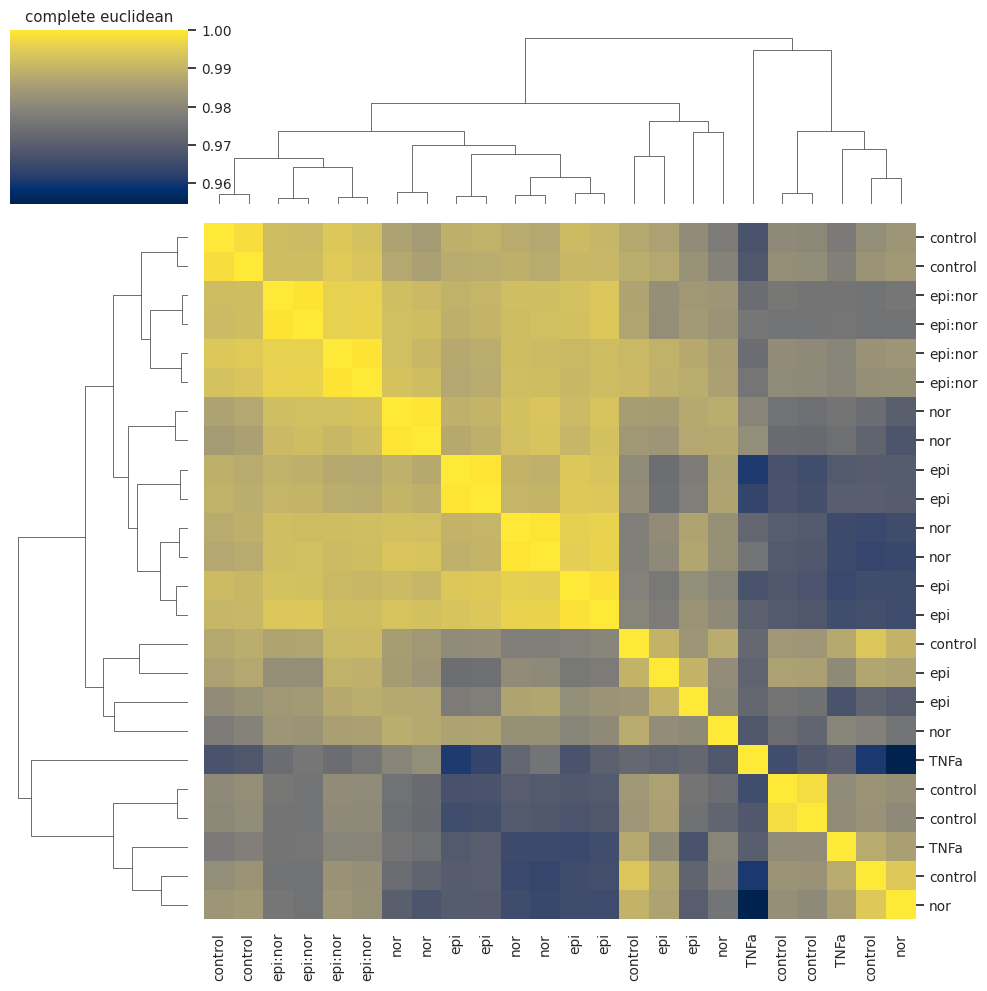

In [27]:
linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df, cmap='cividis')

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [28]:
### 24 h

In [29]:
z = len(late_sample_names)
M = numpy.ones((z, z))
    
for i in range(len(late_sample_names)):
    for j in range(len(late_sample_names)):
        
        sample_a = late_sample_names[i]
        sample_b = late_sample_names[j]
        
        values_a =  qndf.loc[:, sample_a].values
        values_b = qndf.loc[:, sample_b].values
        
        # select only the central part of the distribution, from 8 to 16
        subset_a = []; subset_b = []
        for k in range(len(values_a)):
            if 11 <= values_a[k] <= 16 and 11 <= values_b[k] <= 16:
                subset_a.append(values_a[k]); subset_b.append(values_b[k])
        
        # size
        rho, pval = scipy.stats.spearmanr(subset_a, subset_b)
        M[i, j] = rho

In [30]:
labels = []
for sample in late_sample_names:
    if sample in metadata['24h control']:
        labels.append('control')
    elif sample in metadata['24h epi']:
        labels.append('epi')
    elif sample in metadata['24h nor']:
        labels.append('nor')
    elif sample in metadata['24h epinor']:
        labels.append('epi:nor')
    elif sample in metadata['24h TNFa']:
        labels.append('TNFa')
    else:
        raise ValueError('not classified')

df = pandas.DataFrame(M, index=labels, columns=labels)

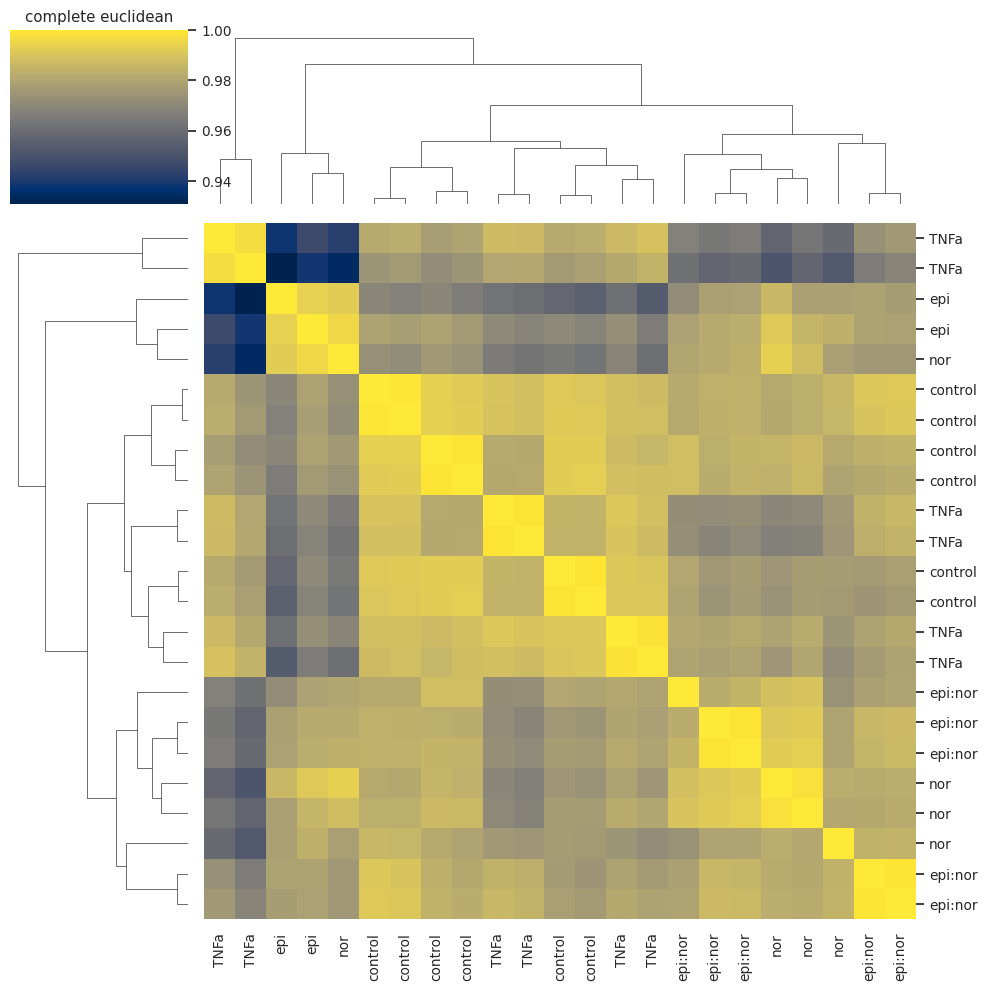

In [31]:
# generate the figure with metabolite names
linkage_method = 'complete'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df, cmap='cividis')

matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [32]:
# BH and limma should be implemented

In [33]:
# Venn diagram due to time only

In [34]:
# Venn diagram due to epi at 4 h and 24 h

In [35]:
# Venn diagram due to nor at 4 h and 24 h

In [36]:
# Venn diagram due to epi:nor at 4 h and 24 h

In [37]:
# Venn diagram due to TNFa at 4 h and 24 h

In [38]:
# Venn diagram of epi, nor, epi:nor at 4 h

In [39]:
# Venn diagram of epi, nor, epi:nor at 24 h

In [40]:
# run a correlation of samples to see if there is a flip